In [54]:
#https://www.youtube.com/watch?v=SSu00IRRraY&list=PL2-dafEMk2A6QKz1mrk1uIGfHkC1zZ6UU&index=5
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

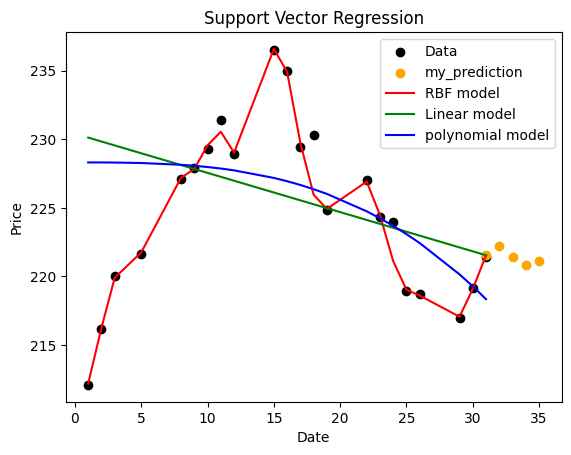

In [102]:
dates= []
prices = []
dates_int = []



def get_data(filename):
    with open(filename,'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvfile:
            dates.append(int (row.split(',')[0].split('/')[1]))     # check for dates
            prices.append(float(row.split(',')[3].replace('$',''))) #check for correct open price collumn
    return




def predict_prices(dates,prices,x):
    dates = np.reshape(dates,(len(dates),1))
    global dates_int
    dates_int = [i for i in range(len(dates))]
    dates_int = np.reshape(dates_int,(len(dates_int),1))
    
    
    
    
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=3)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=.1)
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates, prices, color='black', label='Data') 
    
    ##updated for prediction
    plt.scatter(x,svr_rbf.predict(x), color='orange',label='my_prediction')
    
    
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x), svr_lin.predict(x), svr_poly.predict(x)



predicton_dates = [[x] for x in range(31,36)]
get_data('Apple_30day.csv')
my_prediction_rbf, my_prediction_lin, my_prediction_poly = predict_prices(dates, prices,predicton_dates)


This only works for sorted days in a month. month data has to be from 1-31. The dates cant start from middle of the month. will need to implement a feature adapt to middle of the month.